In [31]:
import os
import json
import requests
from pathlib import Path
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import seaborn as sns

%matplotlib inline

In [32]:
csvpath = Path('pandemic_stock_picks.csv')
cramer_picks_data = pd.read_csv(csvpath, infer_datetime_format=True, parse_dates=True)
cramer_picks_data.sort_index()
cramer_picks_data

,AAPL,AAPL.1,AAPL.2,AAPL.3,AAPL.4,AMD,AMD.1,AMD.2,AMD.3,AMD.4,...,WING,WING.1,WING.2,WING.3,WING.4,ZM,ZM.1,ZM.2,ZM.3,ZM.4
0,open,high,low,close,volume,open,high,low,close,volume,...,open,high,low,close,volume,open,high,low,close,volume
1,282.0,290.82,281.23,288.98,51462221,49.46,49.54,46.74,48.6,117513388,...,77.15,80.91,76.44,79.28,1080468,119.65,122.0,107.0,114.33,45566924.0
2,263.75,278.09,263.0,266.09,131779754,43.03,46.34,42.51,43.26,151826804,...,74.18,76.635,74.05,74.76,721617,105.0,116.5,100.88,113.75,13445523.0
3,277.14,286.44,269.37,285.69,65679929,45.41,45.44,43.1,45.38,72130289,...,77.3,78.7,72.635,76.17,422679,113.8,113.8,105.0,108.4858,10004808.0
4,277.39,281.22,271.86,275.3,58216000,44.19,45.97,43.8,45.69,97129692,...,74.16,74.19,70.0,71.57,659010,108.41,113.99,107.0,110.26,12464414.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,123.75,127.93,122.79,127.79,104597017,85.365,86.5,83.97,86.41,31110935,...,138.37,140.9332,134.34,140.24,551080,388.66,416.2,387.01,409.66,7892457.0
249,128.41,128.72,125.01,125.1601,91481050,86.92,86.95,84.04,84.12,32162320,...,141.77,142.37,134.857,136.03,549973,439.6,440.0,371.82,372.6,17621831.0
250,124.81,125.71,121.84,122.06,99851557,84.28,84.38,80.85,80.85,42616896,...,134.93,135.3,128.67,129.24,609166,383.0,383.25,339.0,341.58,15144463.0
251,121.75,123.6,118.62,120.22,160007520,80.23,81.8067,76.78,77.79,58074683,...,129.23,129.71,119.25,120.35,614088,347.8,358.2999,333.0,342.7,9727871.0


In [33]:
year_close_data = cramer_picks_data[["AAPL.3", "AMD.3", "AMZN.3", "ATVI.3", "COST.3", "CPB.3", "DPZ.3", "ETSY.3", "FB.3", "GOOG.3", "MKC.3", "NFLX.3", "NVDA.3", "OKTA.3", "PEP.3", "PLD.3", "SHOP.3", "TTWO.3", "WING.3", "ZM.3"]].drop([0,1])
year_close_data.apply(pd.to_numeric, axis=0)

,AAPL.3,AMD.3,AMZN.3,ATVI.3,COST.3,CPB.3,DPZ.3,ETSY.3,FB.3,GOOG.3,MKC.3,NFLX.3,NVDA.3,OKTA.3,PEP.3,PLD.3,SHOP.3,TTWO.3,WING.3,ZM.3
2,266.0900,43.260,1800.01,57.165,300.945,50.190,336.26,58.50,168.60,1214.51,143.87,346.03,245.010,114.86,130.15,77.76,417.61,113.83,74.76,113.7500
3,285.6900,45.380,1894.00,60.720,309.670,51.250,344.05,57.97,178.19,1281.01,151.49,364.27,261.080,119.21,134.23,80.86,450.17,118.75,76.17,108.4858
4,275.3000,45.690,1819.63,59.330,297.270,50.475,332.66,50.21,170.22,1215.10,146.61,349.59,246.160,114.77,129.66,73.72,422.23,118.90,71.57,110.2600
5,248.0000,39.005,1676.21,54.560,279.635,47.660,315.61,44.04,154.46,1113.84,131.17,312.63,216.035,106.08,115.34,70.17,377.52,108.35,68.26,109.4700
6,278.0600,43.900,1786.31,59.040,302.690,49.270,316.63,49.01,170.62,1219.76,135.00,336.30,240.830,107.02,127.45,77.81,390.82,116.62,68.05,107.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,127.7900,86.410,3146.61,98.750,331.400,45.490,345.21,244.58,264.39,2081.51,84.55,550.70,553.770,269.81,130.63,99.46,1309.30,187.46,140.24,409.6600
249,125.1601,84.120,3095.99,96.740,328.460,45.630,343.07,238.30,258.95,2076.61,84.92,547.58,536.000,259.36,131.07,99.10,1308.32,188.18,136.03,372.6000
250,122.0600,80.850,3005.01,93.710,323.910,45.800,332.58,208.61,255.44,2025.80,83.20,520.71,512.380,241.22,129.08,96.14,1220.08,180.11,129.24,341.5800
251,120.2200,77.790,2977.04,91.511,319.080,45.810,330.53,198.10,257.59,2049.56,82.90,511.03,494.810,226.09,128.83,95.63,1150.80,174.04,120.35,342.7000


In [34]:
cramer_picks = year_close_data.astype(str).astype(float).loc[:]
cramer_picks.columns = ["AAPL", "AMD", "AMZN", "ATVI", "COST", "CPB", "DPZ", "ETSY", "FB", "GOOG", "MKC", "NFLX", "NVDA", "OKTA", "PEP", "PLD", "SHOP", "TTWO", "WING", "ZM"]
cramer_picks

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,MKC,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM
2,266.0900,43.260,1800.01,57.165,300.945,50.190,336.26,58.50,168.60,1214.51,143.87,346.03,245.010,114.86,130.15,77.76,417.61,113.83,74.76,113.7500
3,285.6900,45.380,1894.00,60.720,309.670,51.250,344.05,57.97,178.19,1281.01,151.49,364.27,261.080,119.21,134.23,80.86,450.17,118.75,76.17,108.4858
4,275.3000,45.690,1819.63,59.330,297.270,50.475,332.66,50.21,170.22,1215.10,146.61,349.59,246.160,114.77,129.66,73.72,422.23,118.90,71.57,110.2600
5,248.0000,39.005,1676.21,54.560,279.635,47.660,315.61,44.04,154.46,1113.84,131.17,312.63,216.035,106.08,115.34,70.17,377.52,108.35,68.26,109.4700
6,278.0600,43.900,1786.31,59.040,302.690,49.270,316.63,49.01,170.62,1219.76,135.00,336.30,240.830,107.02,127.45,77.81,390.82,116.62,68.05,107.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,127.7900,86.410,3146.61,98.750,331.400,45.490,345.21,244.58,264.39,2081.51,84.55,550.70,553.770,269.81,130.63,99.46,1309.30,187.46,140.24,409.6600
249,125.1601,84.120,3095.99,96.740,328.460,45.630,343.07,238.30,258.95,2076.61,84.92,547.58,536.000,259.36,131.07,99.10,1308.32,188.18,136.03,372.6000
250,122.0600,80.850,3005.01,93.710,323.910,45.800,332.58,208.61,255.44,2025.80,83.20,520.71,512.380,241.22,129.08,96.14,1220.08,180.11,129.24,341.5800
251,120.2200,77.790,2977.04,91.511,319.080,45.810,330.53,198.10,257.59,2049.56,82.90,511.03,494.810,226.09,128.83,95.63,1150.80,174.04,120.35,342.7000


In [35]:
cramer_picks["Date"] = pd.date_range(start="03/06/2020", periods=len(cramer_picks), freq="B")
cramer_picks_end = cramer_picks[["Date", "AAPL", "AMD", "AMZN", "ATVI", "COST", "CPB", "DPZ", "ETSY", "FB", "GOOG", "MKC", "NFLX", "NVDA", "OKTA", "PEP", "PLD", "SHOP", "TTWO", "WING", "ZM"]]
cramer_picks_end.reset_index()
cramer_stocks = cramer_picks_end.set_index("Date")
cramer_stocks.tail()

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,MKC,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM
Date,,,,,,,,,,,,,,,,,,,,
2021-02-15,127.7900,86.41,3146.61,98.750,331.40,45.49,345.21,244.58,264.39,2081.51,84.55,550.70,553.77,269.81,130.63,99.46,1309.30,187.46,140.24,409.66
2021-02-16,125.1601,84.12,3095.99,96.740,328.46,45.63,343.07,238.30,258.95,2076.61,84.92,547.58,536.00,259.36,131.07,99.10,1308.32,188.18,136.03,372.60
2021-02-17,122.0600,80.85,3005.01,93.710,323.91,45.80,332.58,208.61,255.44,2025.80,83.20,520.71,512.38,241.22,129.08,96.14,1220.08,180.11,129.24,341.58
2021-02-18,120.2200,77.79,2977.04,91.511,319.08,45.81,330.53,198.10,257.59,2049.56,82.90,511.03,494.81,226.09,128.83,95.63,1150.80,174.04,120.35,342.70
2021-02-19,121.3900,78.53,3000.45,92.560,317.31,46.56,330.15,200.34,264.28,2107.18,84.44,516.38,498.48,215.82,133.05,97.34,1131.00,170.77,120.31,337.67


In [53]:
daily_returns = cramer_stocks.pct_change() 
daily_returns.tail() * 100

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,MKC,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM
Date,,,,,,,,,,,,,,,,,,,,
2021-02-15,5.437294,2.248255,1.754686,3.316593,0.135972,0.043985,-0.329147,11.036455,2.759572,2.352901,0.367996,2.322557,1.016053,3.197552,1.138123,0.383528,2.336233,1.742198,3.004040,9.593365
2021-02-16,-2.057986,-2.650156,-1.608715,-2.035443,-0.887145,0.307760,-0.619913,-2.567667,-2.057566,-0.235406,0.437611,-0.566552,-3.208913,-3.873096,0.336829,-0.361955,-0.074849,0.384082,-3.001997,-9.046526
2021-02-17,-2.476908,-3.887304,-2.938640,-3.132107,-1.385252,0.372562,-3.057685,-12.459085,-1.355474,-2.446776,-2.025436,-4.907046,-4.406716,-6.994139,-1.518273,-2.986882,-6.744527,-4.288447,-4.991546,-8.325282
2021-02-18,-1.507455,-3.784787,-0.930779,-2.346601,-1.491155,0.021834,-0.616393,-5.038109,0.841685,1.172870,-0.360577,-1.859000,-3.429096,-6.272283,-0.193678,-0.530476,-5.678316,-3.370163,-6.878675,0.327888
2021-02-19,0.973216,0.951279,0.786352,1.146310,-0.554720,1.637197,-0.114967,1.130742,2.597151,2.811335,1.857660,1.046905,0.741699,-4.542439,3.275635,1.788142,-1.720542,-1.878878,-0.033236,-1.467756


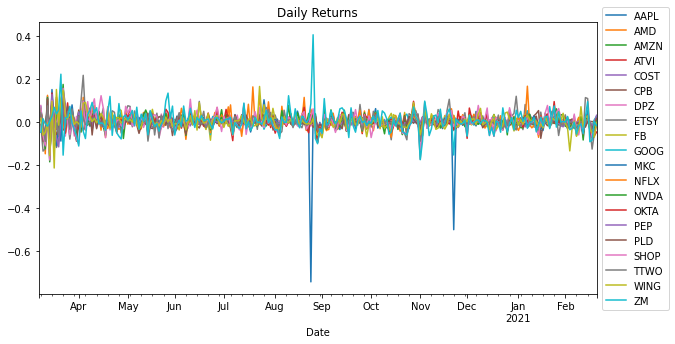

In [37]:
daily_returns.plot(figsize = (10,5), title = "Daily Returns").legend(loc="center left",bbox_to_anchor=(1, .5))

In [58]:
cumulative_returns = ((1+daily_returns).cumprod()-1)
cumulative_returns.tail() * 100

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,MKC,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM
Date,,,,,,,,,,,,,,,,,,,,
2021-02-15,-51.974896,99.745724,74.810695,72.745561,10.119789,-9.364415,2.661631,318.085470,56.814947,71.386814,-41.231667,59.148051,126.019346,134.903361,0.368805,27.906379,213.522186,64.684178,87.586945,260.140659
2021-02-16,-52.963246,94.452150,71.998489,69.229424,9.142867,-9.085475,2.025219,307.350427,53.588375,70.983360,-40.974491,58.246395,118.766581,125.805328,0.706877,27.443416,213.287517,65.316700,81.955591,227.560440
2021-02-17,-54.128302,86.893204,66.944073,63.928978,7.630962,-8.746762,-1.094391,256.598291,51.506524,66.799779,-42.170015,50.481172,109.126158,110.012189,-0.822128,23.636831,192.157755,58.227181,72.873194,200.290110
2021-02-18,-54.819798,79.819695,65.390192,60.082218,6.026018,-8.726838,-1.704039,238.632479,52.781732,68.756124,-42.378536,47.683727,101.955022,96.839631,-1.014214,22.980967,175.568114,52.894667,60.981808,201.274725
2021-02-19,-54.380097,81.530282,66.690741,61.917257,5.437871,-7.232516,-1.817046,242.461538,56.749703,73.500424,-41.308125,49.229836,103.452920,87.898311,2.228198,25.180041,170.826848,50.021963,60.928304,196.852747


In [39]:
cumulative_returns.iloc[-1].mean()

0.6150845995938046

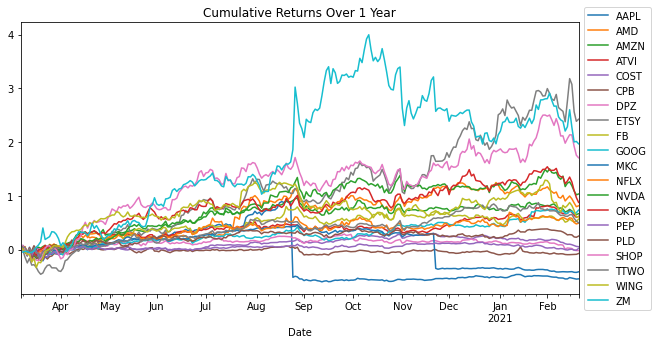

In [40]:
cumulative_returns.plot(figsize=(10,5), title = "Cumulative Returns Over 1 Year").legend(loc = "center left", bbox_to_anchor = (1.0, 0.5));

In [41]:
standard_dev = cumulative_returns.std()
standard_dev 

AAPL    0.452683
AMD     0.399846
AMZN    0.250828
ATVI    0.190681
COST    0.099133
CPB     0.041653
DPZ     0.073058
ETSY    0.901333
FB      0.223634
GOOG    0.208037
MKC     0.296077
NFLX    0.165619
NVDA    0.444898
OKTA    0.390311
PEP     0.052877
PLD     0.117297
SHOP    0.613316
TTWO    0.244940
WING    0.312962
ZM      1.088227
dtype: float64

<AxesSubplot:title={'center':'Standard Deviation'}>

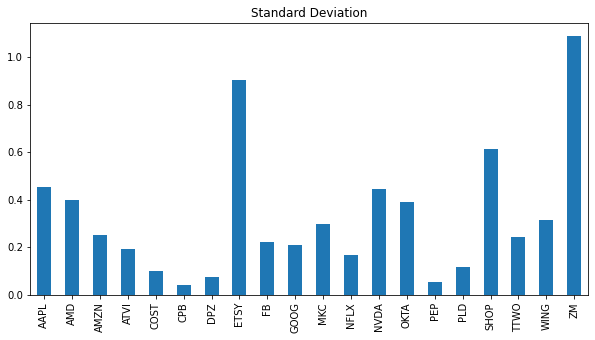

In [42]:
standard_dev.plot.bar(figsize = (10,5), title = "Standard Deviation")

In [43]:
cramer_sharpe_ratio = ( 
    daily_returns.mean() * 252 / (daily_returns.std() * np.sqrt(252))
)
cramer_sharpe_ratio

AAPL   -0.083109
AMD     1.316752
AMZN    1.547993
ATVI    1.429791
COST    0.332800
CPB    -0.080752
DPZ     0.121558
ETSY    2.015518
FB      1.225951
GOOG    1.647317
MKC    -0.432099
NFLX    1.067054
NVDA    1.543451
OKTA    1.494176
PEP     0.242742
PLD     0.740344
SHOP    1.827190
TTWO    1.213619
WING    1.090465
ZM      1.686673
dtype: float64

In [44]:
snp500_data = Path("snp_data_5Y.csv")
snp500_df = pd.read_csv(snp500_data, index_col = "Date", infer_datetime_format = True, parse_dates = True)
snp500 = snp500_df.drop(columns=["High", "Open", "Low", "Volume"])
snp500.columns = ["S&P 500"]
snp500

,S&P 500
Date,
2021-05-28,4204.11
2021-05-27,4200.88
2021-05-26,4195.99
2021-05-25,4188.13
2021-05-24,4197.05
...,...
2016-06-07,2112.13
2016-06-06,2109.41
2016-06-03,2099.13


In [45]:
snp_data_1year = snp500.iloc[59:311, :]
snp_data_1year

,S&P 500
Date,
2021-03-05,3841.94
2021-03-04,3768.47
2021-03-03,3819.72
2021-03-02,3870.29
2021-03-01,3901.82
...,...
2020-03-12,2480.64
2020-03-11,2741.38
2020-03-10,2882.23


<AxesSubplot:title={'center':'SnP 500 1 Year Returns'}, xlabel='Date'>

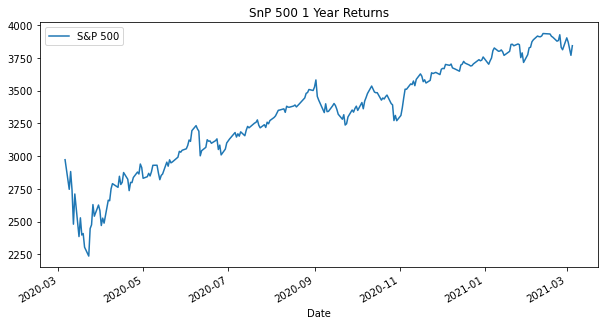

In [46]:
snp_data_1year.plot(figsize=(10,5), title="SnP 500 1 Year Returns")

In [47]:
snp_data_1year.pct_change() * 100

,S&P 500
Date,
2021-03-05,NaN
2021-03-04,-1.912315
2021-03-03,1.359968
2021-03-02,1.323919
2021-03-01,0.814668
...,...
2020-03-12,-8.497909
2020-03-11,10.510997
2020-03-10,5.137923


In [52]:
snp_change = snp_data_1year.pct_change() * 100
snp_change.mean()

S&P 500   -0.079531
dtype: float64

In [19]:
snp500_sharpe_ratio = (
    snp_data_1year.mean() / (snp_data_1year.std() * np.sqrt(252))
)

snp500_sharpe_ratio

S&P 500    0.527627
dtype: float64

In [20]:
combined_df = pd.concat([cramer_stocks, snp_data_1year], axis = "columns", join = "inner")
combined_df

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,...,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-06,288.9800,48.600,1901.14,59.960,311.340,51.750,336.47,60.61,181.11,1298.41,...,368.90,266.070,125.99,137.27,85.83,472.0877,117.71,79.28,114.3300,2972.37
2020-03-09,266.0900,43.260,1800.01,57.165,300.945,50.190,336.26,58.50,168.60,1214.51,...,346.03,245.010,114.86,130.15,77.76,417.6100,113.83,74.76,113.7500,2746.56
2020-03-10,285.6900,45.380,1894.00,60.720,309.670,51.250,344.05,57.97,178.19,1281.01,...,364.27,261.080,119.21,134.23,80.86,450.1700,118.75,76.17,108.4858,2882.23
2020-03-11,275.3000,45.690,1819.63,59.330,297.270,50.475,332.66,50.21,170.22,1215.10,...,349.59,246.160,114.77,129.66,73.72,422.2300,118.90,71.57,110.2600,2741.38
2020-03-12,248.0000,39.005,1676.21,54.560,279.635,47.660,315.61,44.04,154.46,1113.84,...,312.63,216.035,106.08,115.34,70.17,377.5200,108.35,68.26,109.4700,2480.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-16,127.7900,86.410,3146.61,98.750,331.400,45.490,345.21,244.58,264.39,2081.51,...,550.70,553.770,269.81,130.63,99.46,1309.3000,187.46,140.24,409.6600,3932.59
2021-02-17,125.1601,84.120,3095.99,96.740,328.460,45.630,343.07,238.30,258.95,2076.61,...,547.58,536.000,259.36,131.07,99.10,1308.3200,188.18,136.03,372.6000,3931.33
2021-02-18,122.0600,80.850,3005.01,93.710,323.910,45.800,332.58,208.61,255.44,2025.80,...,520.71,512.380,241.22,129.08,96.14,1220.0800,180.11,129.24,341.5800,3913.97


In [21]:
price_correlation = combined_df.corr()
price_correlation

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,...,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM,S&P 500
AAPL,1.000000,-0.525737,-0.303766,-0.321180,-0.615635,0.574580,-0.021047,-0.498891,-0.362790,-0.476459,...,-0.341184,-0.550462,-0.437670,-0.322573,-0.232711,-0.334990,-0.435373,0.042131,-0.691439,-0.497147
AMD,-0.525737,1.000000,0.879544,0.821511,0.897774,-0.171799,0.574953,0.866404,0.870057,0.813628,...,0.840293,0.937690,0.867010,0.758998,0.795821,0.852215,0.933137,0.710458,0.820541,0.902651
AMZN,-0.303766,0.879544,1.000000,0.851805,0.815813,-0.041627,0.752436,0.799539,0.949988,0.778739,...,0.942186,0.939928,0.886189,0.729850,0.907315,0.912908,0.863631,0.855777,0.825552,0.871862
ATVI,-0.321180,0.821511,0.851805,1.000000,0.637984,-0.164996,0.502321,0.940966,0.798822,0.903571,...,0.914024,0.853701,0.940529,0.596928,0.789706,0.966752,0.927940,0.822295,0.665209,0.914842
COST,-0.615635,0.897774,0.815813,0.637984,1.000000,-0.130126,0.570537,0.729789,0.830098,0.705172,...,0.738483,0.890124,0.771186,0.808557,0.722500,0.712651,0.797659,0.518208,0.875528,0.794656
CPB,0.574580,-0.171799,-0.041627,-0.164996,-0.130126,1.000000,0.230945,-0.274386,-0.045952,-0.232265,...,-0.081758,-0.215903,-0.188386,0.211824,0.020474,-0.143667,-0.198214,0.169618,-0.313904,-0.222474
DPZ,-0.021047,0.574953,0.752436,0.502321,0.570537,0.230945,1.000000,0.364431,0.732392,0.327660,...,0.663358,0.650098,0.563786,0.628386,0.735531,0.588536,0.504396,0.748398,0.605541,0.487227
ETSY,-0.498891,0.866404,0.799539,0.940966,0.729789,-0.274386,0.364431,1.000000,0.764848,0.938934,...,0.861838,0.870025,0.942457,0.602040,0.720431,0.930924,0.947481,0.679582,0.725368,0.942410
FB,-0.362790,0.870057,0.949988,0.798822,0.830098,-0.045952,0.732392,0.764848,1.000000,0.791183,...,0.878439,0.939528,0.863823,0.748371,0.878429,0.870160,0.828771,0.798268,0.831970,0.874120
GOOG,-0.476459,0.813628,0.778739,0.903571,0.705172,-0.232265,0.327660,0.938934,0.791183,1.000000,...,0.832257,0.853767,0.906731,0.599038,0.728126,0.893559,0.879532,0.646732,0.676125,0.939057


<AxesSubplot:>

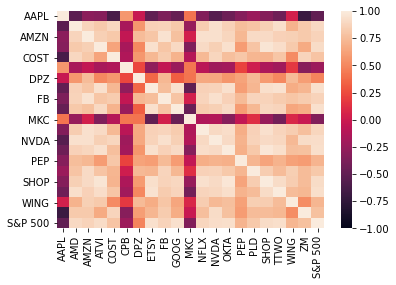

In [22]:
sns.heatmap(price_correlation, vmin = -1, vmax = 1)

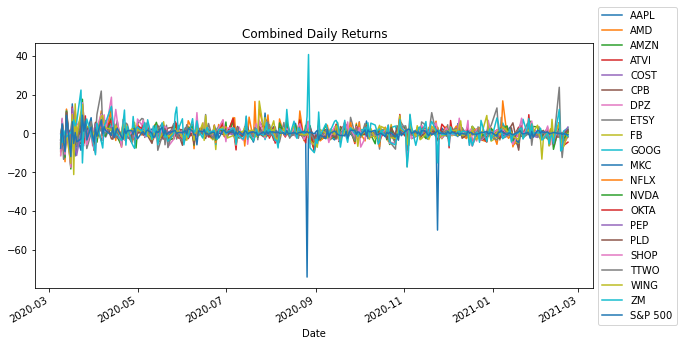

In [23]:
combined_daily_returns = (combined_df.pct_change()) * 100
combined_daily_returns.plot(figsize = (10,5), title = "Combined Daily Returns").legend(loc = "center left", bbox_to_anchor = (1.0, 0.5));

In [24]:
correlation = combined_daily_returns.corr()
correlation

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,...,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM,S&P 500
AAPL,1.000000,0.261488,0.354486,0.293582,0.358130,0.175676,0.263336,0.283487,0.409461,0.398064,...,0.273334,0.385740,0.201894,0.345662,0.342030,0.262583,0.285914,0.232094,-0.015493,0.241263
AMD,0.261488,1.000000,0.621686,0.557875,0.572331,0.291346,0.456512,0.450749,0.557552,0.567153,...,0.513470,0.778814,0.559664,0.517283,0.504093,0.601813,0.605869,0.496654,0.205817,0.405828
AMZN,0.354486,0.621686,1.000000,0.626194,0.626526,0.277779,0.459022,0.464646,0.689711,0.664558,...,0.714101,0.665619,0.592171,0.495451,0.455679,0.578515,0.583242,0.366932,0.290251,0.332403
ATVI,0.293582,0.557875,0.626194,1.000000,0.577722,0.324985,0.425492,0.478639,0.516837,0.546645,...,0.634384,0.603290,0.538212,0.547400,0.457978,0.517054,0.736914,0.338225,0.316258,0.350467
COST,0.358130,0.572331,0.626526,0.577722,1.000000,0.413757,0.428623,0.424500,0.560445,0.611647,...,0.540567,0.670340,0.421885,0.710761,0.570077,0.445217,0.566682,0.262783,0.115576,0.452641
CPB,0.175676,0.291346,0.277779,0.324985,0.413757,1.000000,0.220953,0.192730,0.258328,0.263326,...,0.238579,0.297398,0.266994,0.515828,0.300103,0.190231,0.338462,0.175755,0.017948,0.200803
DPZ,0.263336,0.456512,0.459022,0.425492,0.428623,0.220953,1.000000,0.355770,0.428978,0.403846,...,0.452680,0.534496,0.486632,0.389493,0.306050,0.446012,0.485295,0.529420,0.221901,0.305085
ETSY,0.283487,0.450749,0.464646,0.478639,0.424500,0.192730,0.355770,1.000000,0.382807,0.409889,...,0.408600,0.539743,0.528388,0.446958,0.451142,0.663773,0.485646,0.486512,0.326558,0.351755
FB,0.409461,0.557552,0.689711,0.516837,0.560445,0.258328,0.428978,0.382807,1.000000,0.789756,...,0.563570,0.673092,0.463882,0.548913,0.572055,0.505837,0.487875,0.416775,0.055662,0.455643
GOOG,0.398064,0.567153,0.664558,0.546645,0.611647,0.263326,0.403846,0.409889,0.789756,1.000000,...,0.546327,0.717702,0.450635,0.627373,0.624417,0.479602,0.454893,0.387458,0.019646,0.517856


<AxesSubplot:>

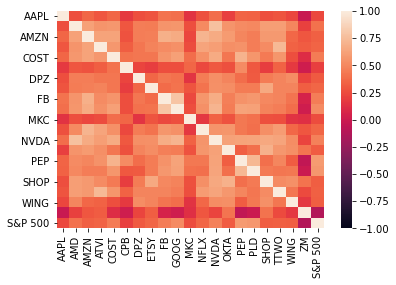

In [25]:
sns.heatmap(correlation, vmin = -1, vmax = 1)

In [26]:
AAPLcovariance = combined_daily_returns["AAPL"].cov(combined_daily_returns["S&P 500"])
AMDcovariance = combined_daily_returns["AMD"].cov(combined_daily_returns["S&P 500"])
AMZNcovariance = combined_daily_returns["AMZN"].cov(combined_daily_returns["S&P 500"])
ATVIcovariance = combined_daily_returns["ATVI"].cov(combined_daily_returns["S&P 500"])
COSTcovariance = combined_daily_returns["COST"].cov(combined_daily_returns["S&P 500"])
CPBcovariance = combined_daily_returns["CPB"].cov(combined_daily_returns["S&P 500"])
DPZcovariance = combined_daily_returns["DPZ"].cov(combined_daily_returns["S&P 500"])
ETSYcovariance = combined_daily_returns["ETSY"].cov(combined_daily_returns["S&P 500"])
FBcovariance = combined_daily_returns["FB"].cov(combined_daily_returns["S&P 500"])
GOOGcovariance = combined_daily_returns["GOOG"].cov(combined_daily_returns["S&P 500"])
MKCcovariance = combined_daily_returns["MKC"].cov(combined_daily_returns["S&P 500"])
NFLXcovariance = combined_daily_returns["NFLX"].cov(combined_daily_returns["S&P 500"])
NVDAcovariance = combined_daily_returns["NVDA"].cov(combined_daily_returns["S&P 500"])
OKTAcovariance = combined_daily_returns["OKTA"].cov(combined_daily_returns["S&P 500"])
PEPcovariance = combined_daily_returns["PEP"].cov(combined_daily_returns["S&P 500"])
PLDcovariance = combined_daily_returns["PLD"].cov(combined_daily_returns["S&P 500"])
SHOPcovariance = combined_daily_returns["SHOP"].cov(combined_daily_returns["S&P 500"])
TTWOcovariance = combined_daily_returns["TTWO"].cov(combined_daily_returns["S&P 500"])
WINGcovariance = combined_daily_returns["WING"].cov(combined_daily_returns["S&P 500"])
ZMcovariance = combined_daily_returns["ZM"].cov(combined_daily_returns["S&P 500"])

In [27]:
AAPLvariance = combined_daily_returns["AAPL"].var()
AMDvariance = combined_daily_returns["AMD"].var()
AMZNvariance = combined_daily_returns["AMZN"].var()
ATVIvariance = combined_daily_returns["ATVI"].var()
COSTvariance = combined_daily_returns["COST"].var()
CPBvariance = combined_daily_returns["CPB"].var()
DPZvariance = combined_daily_returns["DPZ"].var()
ETSYvariance = combined_daily_returns["ETSY"].var()
FBvariance = combined_daily_returns["FB"].var()
GOOGvariance = combined_daily_returns["GOOG"].var()
MKCvariance = combined_daily_returns["MKC"].var()
NFLXvariance = combined_daily_returns["NFLX"].var()
NVDAvariance = combined_daily_returns["NVDA"].var()
OKTAvariance = combined_daily_returns["OKTA"].var()
PEPvariance = combined_daily_returns["PEP"].var()
PLDvariance = combined_daily_returns["PLD"].var()
SHOPvariance = combined_daily_returns["SHOP"].var()
TTWOvariance = combined_daily_returns["TTWO"].var()
WINGvariance = combined_daily_returns["WING"].var()
ZMvariance = combined_daily_returns["ZM"].var()

In [28]:
AAPLbeta = AAPLcovariance / AAPLvariance
print(f"AAPL Beta is {AAPLbeta}")

AMDbeta = AMDcovariance / AMDvariance
print(f"AMD Beta is {AMDbeta}")

AMZNbeta = AMZNcovariance / AMZNvariance
print(f"AMZN Beta is {AMZNbeta}")

ATVIbeta = ATVIcovariance / ATVIvariance
print(f"ATVI Beta is {ATVIbeta}")

COSTbeta = COSTcovariance / COSTvariance
print(f"COST Beta is {COSTbeta}")

CPBbeta = CPBcovariance / CPBvariance
print(f"CPB Beta is {CPBbeta}")

DPZbeta = DPZcovariance / DPZvariance
print(f"DPZ Beta is {DPZbeta}")

ETSYbeta = ETSYcovariance / ETSYvariance
print(f"ETSY Beta is {ETSYbeta}")

FBbeta = FBcovariance / FBvariance
print(f"FB Beta is {FBbeta}")

GOOGbeta = GOOGcovariance / GOOGvariance
print(f"GOOG Beta is {GOOGbeta}")

MKCbeta = MKCcovariance / MKCvariance
print(f"MKC Beta is {MKCbeta}")

NVDAbeta = NVDAcovariance / NVDAvariance
print(f"NVDA Beta is {NVDAbeta}")

OKTAbeta = OKTAcovariance / OKTAvariance
print(f"OKTA Beta is {OKTAbeta}")

PEPbeta = PEPcovariance / PEPvariance
print(f"PEP Beta is {PEPbeta}")

PLDbeta = PLDcovariance / PLDvariance
print(f"PLD Beta is {PLDbeta}")

SHOPbeta = SHOPcovariance / SHOPvariance
print(f"SHOP Beta is {SHOPbeta}")

TTWObeta = TTWOcovariance / TTWOvariance
print(f"TTWO Beta is {TTWObeta}")

WINGbeta = WINGcovariance / WINGvariance
print(f"WING Beta is {WINGbeta}")

ZMbeta = ZMcovariance / ZMvariance
print(f"ZM Beta is {ZMbeta}")

AAPL Beta is 0.09126996448211602
AMD Beta is 0.22246577024363967
AMZN Beta is 0.2793126178362778
ATVI Beta is 0.2930983449142986
COST Beta is 0.5632438858854732
CPB Beta is 0.20619429437459116
DPZ Beta is 0.2920478965737803
ETSY Beta is 0.14917768253293706
FB Beta is 0.3280132080217194
GOOG Beta is 0.44426883391682004
MKC Beta is 0.1323248568946565
NVDA Beta is 0.27283126971552557
OKTA Beta is 0.19914380792536487
PEP Beta is 0.5418764836643432
PLD Beta is 0.4318876915452893
SHOP Beta is 0.15498966255015034
TTWO Beta is 0.2713375479166352
WING Beta is 0.1745804311762044
ZM Beta is -0.04660480636733951
